In [6]:
### TASK 1 CODE STARTS HERE ###

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

iris = load_iris()
X = iris.data
y = iris.target

# Feature combinations
feat2 = [0, 1]        # 2 features
feat3 = [0, 1, 2]     # 3 features
feat4 = [0, 1, 2, 3]  # 4 features

combinations = [feat2, feat3, feat4]

for i, feats in enumerate(combinations, start=1):
    X_sel = X[:, feats]
    clf = DecisionTreeClassifier()
    clf.fit(X_sel, y)

    print(f"\n--- Decision Tree for {len(feats)} Features ---")
    print("Predictions:", clf.predict(X_sel[:5]))

    # Plot tree
    plt.figure(figsize=(10, 6))
    plot_tree(clf, filled=True, feature_names=[iris.feature_names[f] for f in feats])
    plt.title(f"Decision Tree ({len(feats)} features)")
    plt.show()

### TASK 1 CODE ENDS HERE ###


In [12]:
iris = load_iris()
X = iris.data
y = iris.target


In [13]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2



--- Decision Tree for 2 Features ---
Predictions: [0 0 0 0 0]


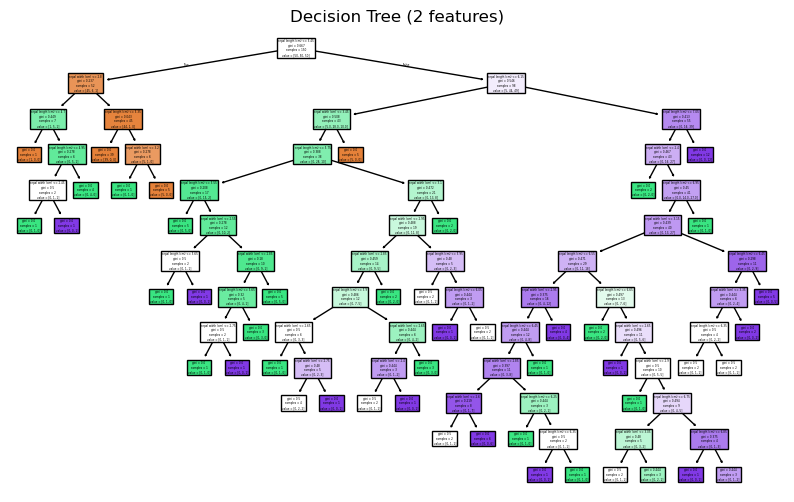


--- Decision Tree for 3 Features ---
Predictions: [0 0 0 0 0]


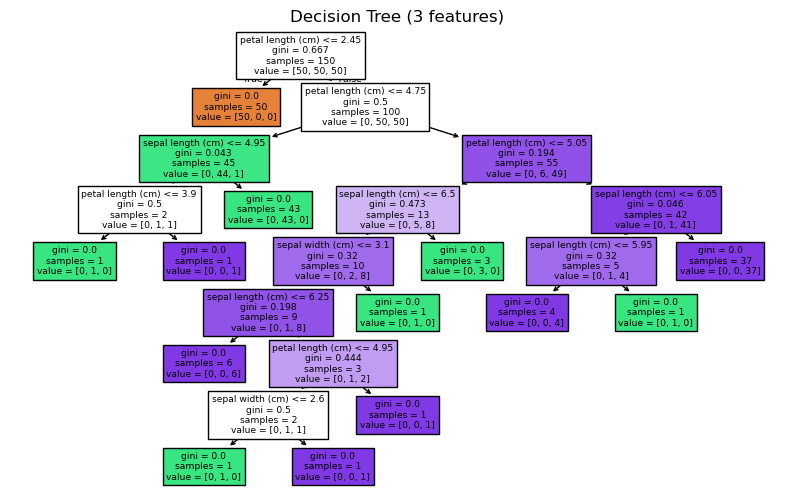


--- Decision Tree for 4 Features ---
Predictions: [0 0 0 0 0]


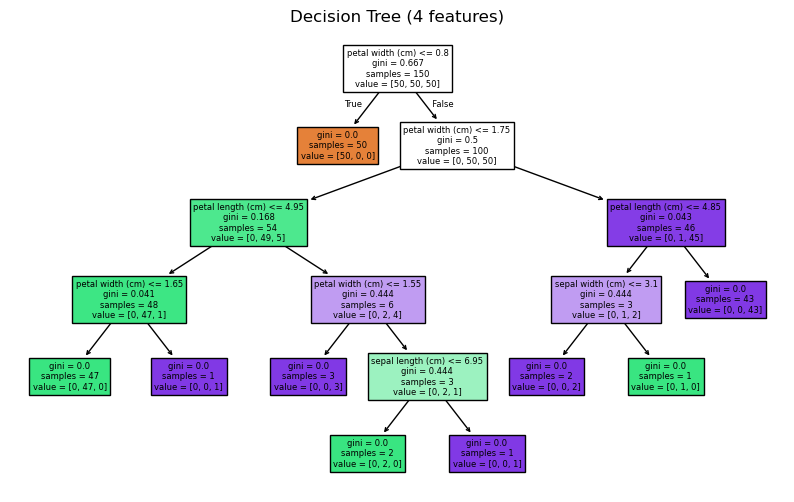

In [8]:
# Feature combinations
feat2 = [0, 1]        # 2 features
feat3 = [0, 1, 2]     # 3 features
feat4 = [0, 1, 2, 3]  # 4 features

combinations = [feat2, feat3, feat4]

for i, feats in enumerate(combinations, start=1):
    X_sel = X[:, feats]
    clf = DecisionTreeClassifier()
    clf.fit(X_sel, y)

    print(f"\n--- Decision Tree for {len(feats)} Features ---")
    print("Predictions:", clf.predict(X_sel[:5]))

    # Plot tree
    plt.figure(figsize=(10, 6))
    plot_tree(clf, filled=True, feature_names=[iris.feature_names[f] for f in feats])
    plt.title(f"Decision Tree ({len(feats)} features)")
    plt.show()


# Task 2

In [17]:
from collections  import Counter

In [18]:
def euclidean(a,b):
    return np.sqrt(np.sum((a-b)**2))

In [20]:
def knn_predict(X, y, test_point, k=3):
    distances = [euclidean(test_point, x) for x in X]
    idx = np.argsort(distances)[:k]
    selected_labels = y[idx]
    return Counter(selected_labels).most_common(1)[0][0]

Prediction for 2 features: 0


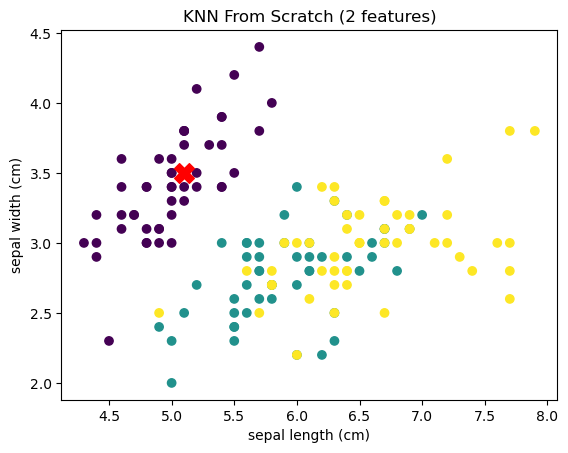

Prediction for 3 features: 0


In [22]:
### TASK 2 CODE STARTS HERE ###

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from collections import Counter

iris = load_iris()
X = iris.data
y = iris.target

def euclidean(a, b):
    return np.sqrt(np.sum((a - b)**2))

def knn_predict(X, y, test_point, k=3):
    distances = [euclidean(test_point, x) for x in X]
    idx = np.argsort(distances)[:k]
    selected_labels = y[idx]
    return Counter(selected_labels).most_common(1)[0][0]

# Feature selections
feat2 = [0, 1]
feat3 = [0, 1, 2]

for feats in [feat2, feat3]:
    X_sel = X[:, feats]
    test_sample = X_sel[0]  # choose one test point

    prediction = knn_predict(X_sel, y, test_sample)
    print(f"Prediction for {len(feats)} features: {prediction}")

    # Scatter Plot
    if len(feats) == 2:
        plt.scatter(X_sel[:, 0], X_sel[:, 1], c=y)
        plt.scatter(test_sample[0], test_sample[1], c='red', marker='X', s=200)
        plt.title(f"KNN From Scratch ({len(feats)} features)")
        plt.xlabel(iris.feature_names[feats[0]])
        plt.ylabel(iris.feature_names[feats[1]])
        plt.show()

### TASK 2 CODE ENDS HERE ###


In [23]:
from sklearn.neighbors import KNeighborsClassifier

KNN Prediction (2 features): [0]


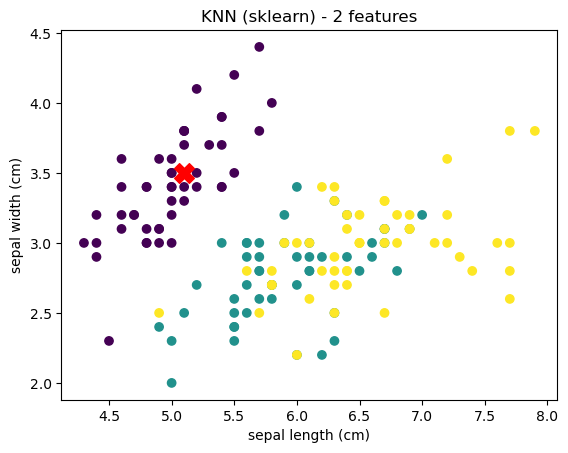

KNN Prediction (3 features): [0]
KNN Prediction (4 features): [0]


In [24]:
feat2 = [0, 1]
feat3 = [0, 1, 2]
feat4 = [0, 1, 2, 3]

for feats in [feat2, feat3, feat4]:
    X_sel = X[:, feats]

    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_sel, y)

    print(f"KNN Prediction ({len(feats)} features):", knn.predict([X_sel[0]]))

    # For 2D scatter plots only
    if len(feats) == 2:
        plt.scatter(X_sel[:, 0], X_sel[:, 1], c=y)
        plt.scatter(X_sel[0, 0], X_sel[0, 1], c='red', marker='X', s=200)
        plt.title(f"KNN (sklearn) - {len(feats)} features")
        plt.xlabel(iris.feature_names[feats[0]])
        plt.ylabel(iris.feature_names[feats[1]])
        plt.show()

SVM Prediction (2 features): [0]


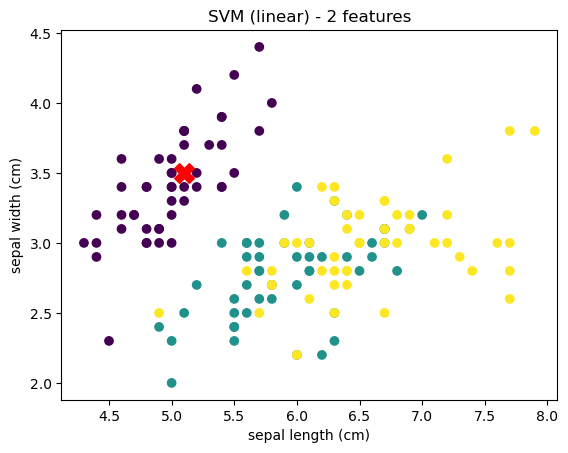

SVM Prediction (3 features): [0]


In [25]:
### TASK 4 CODE STARTS HERE ###

from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

feat2 = [0, 1]
feat3 = [0, 1, 2]

for feats in [feat2, feat3]:
    X_sel = X[:, feats]
    svm = SVC(kernel='linear')
    svm.fit(X_sel, y)

    print(f"SVM Prediction ({len(feats)} features):", svm.predict([X_sel[0]]))

    # Only possible to visualize 2 features completely
    if len(feats) == 2:
        plt.scatter(X_sel[:, 0], X_sel[:, 1], c=y)

        # plot test point
        plt.scatter(X_sel[0, 0], X_sel[0, 1], c='red', marker='X', s=200)
        plt.title(f"SVM (linear) - {len(feats)} features")
        plt.xlabel(iris.feature_names[feats[0]])
        plt.ylabel(iris.feature_names[feats[1]])
        plt.show()

### TASK 4 CODE ENDS HERE ###
